# MDI220 Project 
## Adrien Boitreaud
## Exercise 1

In [247]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from os import path
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
# check datasets
if not all([path.isfile(filename) for filename in ['C_id_35_NuclearPowerAccidents2016.csv']]):
    print('Please download the datasets and save them in the working directory.')
else:
    print("You're ready!")

You're ready!


In [249]:
TMIdate = pd.to_datetime('3/28/1979')
df = pd.read_csv('C_id_35_NuclearPowerAccidents2016.csv')
dates  = df['Date']
dates = pd.to_datetime(dates)
df['Date'] = dates

anterior = df[df.Date < TMIdate]

df_clean = anterior.dropna(subset = ['Cost (millions 2013US$)'])

print("There are" , df_clean.shape[0] , "observations left in the data frame.") 
cost_clean = df_clean['Cost (millions 2013US$)']
x =  cost_clean.to_numpy()

There are 55 observations left in the data frame.


### Question 2

Let's prove that $F_\theta ^{-1}$ = $\sigma$$F_{(0,1)}^{-1}$+$\mu$ \
We first have that $F_X(a)$ = $\int_{-\infty}^a \frac{1}{\sqrt{2\pi\sigma^2}}\mathrm{e}^{-\frac{(x-\mu)^2}{2\sigma ^2}},\mathrm{d}x$ \

Then, if we substitute t = $\frac{x - \mu}{\sqrt{2} \sigma}$, the previous line becomes : \
$F_X(a)$  = $\int_{-\infty}^{\frac{a-\mu}{\sqrt{2}\sigma}}\frac{\sqrt{2\sigma^2}}{\sqrt{2\pi\sigma^2}}\mathrm{e}^{-t^2}\mathrm{d}t$\
$F_X(a)$ = ${\frac{1}{\sqrt{\pi}}}\int_{-\infty}^{0}\mathrm{e}^{-t^2}\mathrm{d}t$ + ${\frac{1}{\sqrt{\pi}}}\int_{0}^{\frac{a-\mu}{\sqrt{2}\sigma}}\mathrm{e}^{-t^2}\mathrm{d}t$\
We know that $\int_{-\infty}^{+\infty}\mathrm{e}^{-t^2}\mathrm{d}t$ = $\frac{\sqrt{\pi}}{2}$\
So $F_X(a)$ = $\frac{1}{2} + {\frac{1}{\sqrt{\pi}}}\int_{0}^{\frac{a-\mu}{\sqrt{2}\sigma}}\mathrm{e}^{-t^2}\mathrm{d}t$ \
We can write $F_X(a)$ as :\
$F_X(a)$ = $\frac{1}{2} [ 1 + erf(\frac{a-\mu}{\sqrt{2}\sigma})]$  where $erf(a) = \frac{2}{\sqrt{\pi}} \int_{0}^{a}\mathrm{e}^{-t^2}\mathrm{d}t$


Now, we can use the last line to obtain the relation on the quantile function : \
Let p $\in [0,1]$ \
Say p = $ \frac{1}{2} [ 1 + erf(\frac{a-\mu}{\sqrt{2}\sigma})]$\
This means that $2p-1$ = $erf(\frac{a-\mu}{\sqrt{2}\sigma})$\
$erf^{-1}(2p-1) = \frac{a-\mu}{\sqrt{2}\sigma} $ \
$\sqrt{2}\sigma erf^{-1}(2p-1) = a-\mu $\
$ F_{\theta}^{-1}(p) = \sqrt{2}\sigma erf^{-1}(2p-1) + \mu $

If we do the same computation for $ \mathcal{N}(0,1)$, we get  $F_{(0,1)}^{-1}(p) =\sqrt{2} erf^{-1}(2p-1)$

So we've obtained that $ F_{\theta}^{-1}(p) = \sigma F_{(0,1)}^{-1}(p) + \mu$


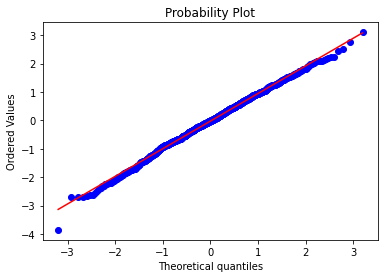

In [250]:
rng = np.random.default_rng()
X = stats.norm.rvs(loc=0, scale=1, size=1000, random_state=rng)
res = stats.probplot(X, plot=plt)

For a normal distribution of mean 0 and variance 1 here, the quantile distribution is very well approximated by a line. By testing different parameters, we check that it is the case whatever the mean and the variance are.

### Question 3 

Let $F_\theta $ be the cumulative distribution function of X, randome variable with an exponential distribution of parameter $\theta > 0$\
Then X has a density $\forall a > 0, f_X(a) = \theta \mathrm{e}^{-\theta x }$ \
We can compute $F_\theta (a) = \mathrm{e}^{-\theta a } -1$\
Let $p\in[0,1]$
$p=\mathrm{e}^{-\theta a } -1$\
$-\theta a = \ln(p+1)$
So $ F_\theta^{-1} (p) = -\frac{\ln(p+1)}{\theta}$
For $\theta = 1$, $F_1^{-1} (p)= -\ln(p+1)$\
We therefore have that $ F_\theta^{-1} (p) = \frac{F_1^{-1} (p)}{\theta}$

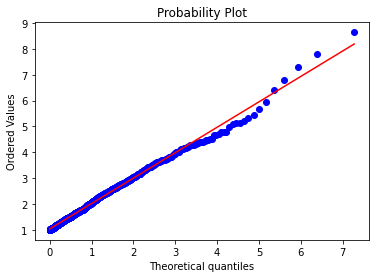

In [251]:
theta = 1
vect = stats.expon.rvs(loc=1/theta, size=1000, random_state=rng)
stats.probplot(vect, dist = 'expon', plot = plt)
plt.show()

### Question 4

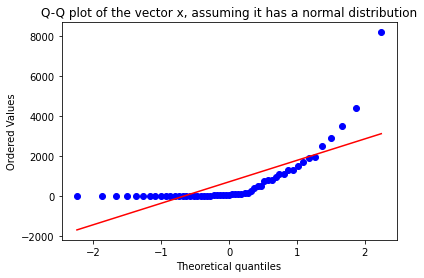

In [252]:
stats.probplot(x, plot = plt)
plt.title('Q-Q plot of the vector x, assuming it has a normal distribution')
plt.show()

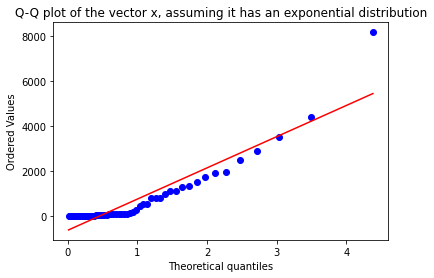

In [253]:
stats.probplot(x, dist='expon', plot = plt)
plt.title('Q-Q plot of the vector x, assuming it has an exponential distribution')
plt.show()

We see that the firt chart is not well approximated by a line whereas the approximation by a line is better in the second case, when we assumed x had an exponential distribution. We can therefore conclude that the distribution of the 55 samples in the vector x can be approximated as an exponential distribution.

## Exercise 2
### Question 1 

Let n = 55.
We suppose that we have n iid observations of an exponential distribution of parameter $\theta >0$\
Hence $p_{\theta}(x) = \prod\limits_{i = 1}^n \theta \mathrm{e}^{-\theta x_i} = \theta^n \mathrm{e}^{-\theta S}$ where S = $\sum\limits_{i=1}^n x_i $\
So $\ln(p_{\theta}(x)) = n \ln(\theta) - \theta S $\
$\hat{\theta}$ is such that $ \frac{\partial ln(p_{\theta}(x))}{\partial \theta} (\hat{\theta}) =0$\
Since $ \frac{\partial ln(p_{\theta}(x))}{\partial \theta} (\theta) = \frac{n}{\theta} - S$, \
We have that $\hat{\theta} = \frac{n}{S} = \frac{1}{\bar{x}}$ with $\bar{x} = \frac{1}{n} \sum\limits_{i=1}^n x_i $, the empirical mean of vector x

### Question 2

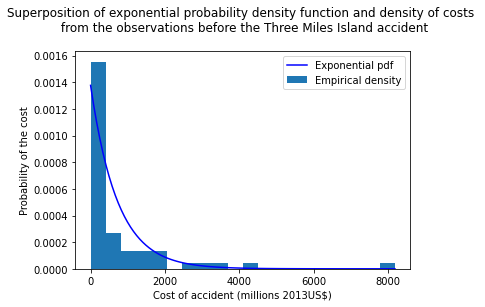

In [256]:
MLE =1/ np.mean(x)

y = np.linspace(0,np.max(x),100)
plt.plot(y, stats.expon.pdf(y, scale = 1/MLE),'b-', label='Exponential pdf')

plt.hist(x, density = True, label ='Empirical density', bins =20)
plt.legend()
plt.xlabel('Cost of accident (millions 2013US$)')
plt.ylabel('Probability of the cost')
plt.title('Superposition of exponential probability density function and density of costs \n from the observations before the Three Miles Island accident', pad=20)
plt.show()


### Question 3

Let's use the method of moments.\
Then $\mathbb{E}_{\theta}(X)= \hat{\theta}(x)$ and $\mathbb{E}_{\theta}(g(X))= \hat{g}(x)$\
But $\mathbb{E}(g(\theta)) = g (\mathbb{E}(X)) = g(\hat{\theta}(x))$\
Now we can replace g by its expression. We get $\mathbb{E}(g(\theta)) = \frac{1}{\hat{\theta}(x)}$\
And we also know that $\hat{\theta}(x) = \frac{1}{\bar{x}}$
Finally it comes that $\hat{g}(x) = \bar{x} = \frac{1}{n} \sum\limits_{i=1}^n x_i$

### Question 4

In [260]:
mean = np.mean(x)
print("Our estimator of g of theta is equal to ", round(mean,2))

Our estimator of g of theta is equal to  726.34


### Question 5

Let $\theta>0 $\
Let's calculate $R(\theta , \hat{g}_{\eta})$
$R(\theta , \hat{g}_{\eta}) = b (g_{\eta}(\theta), \hat{g}_{\eta}(X))^2 + \mathrm{Var}(\hat{g}_{\eta}(X))$\
We know that $ \hat{g}_{\eta}(X) = \eta\frac{1}{n} \sum\limits_{i=1}^n x_i $ and that $\forall i \in (1,...,n), \mathrm{Var}(X_i) = \frac{1}{\theta^2}$\
So $\mathrm{Var}(\hat{g}_{\eta}(X)) = \eta^2 \mathrm{Var}(\hat{g}(X)) = \eta^2 \frac{1}{n \theta^2}$ (1)\
Then, $b (g_{\eta}(\theta), \hat{g}_{\eta}(X))^2 = \mathrm{E}(g_{\eta}(\theta) - \hat{g}_{\eta}(X))^2$
                                                $ = \mathrm{E}(\eta g(\theta) - \eta\hat{g}(X))^2$
                                                $ = \eta^2\mathrm{E}(g(\theta) -\hat{g}(X))^2$ (2)
                                                
Combining (1) and (2), we get that $ R(\theta , \hat{g}_{\eta}) = \eta^2 R(\theta , \hat{g})$\
So this means that $R(\theta , \hat{g}_{\eta}) < R(\theta , \hat{g}) \Leftrightarrow \boxed{ \eta^2 < 1}$\
So $ \forall \eta \in ]0,1[ $, the inequality is proven.

### Question 6

We want to estimate the median cost:
Let $\mu$ be the median of our samples.\
We then have: $\frac{1}{2} = \int_0 ^\mu \theta \mathrm{e}^{-\theta x } \mathrm{d}x$\
This means that $\frac{1}{2} = 1 - \mathrm{e}^{-\theta \mu}$\
Therefore, $\mu = \frac{\ln(2)}{\theta}$

$\hat{\mu} = \frac{\ln(2)}{\hat{\theta}} = \ln(2) \hat{g}(\theta)$

So for $\boxed{\eta = \ln(2)}$, $\hat{\mu} =  \hat{g}_{\eta}(\theta)$

In this case, we can check that $b (g_{\ln(2)}(\theta), \hat{g}_{\ln(2)}(X)) = \ln(2)(\mathrm{E}(g(\theta) -\hat{g}(X))$

$b (g_{\eta}(\theta), \hat{g}_{\eta}(X)) = \ln(2)[\frac{1}{\theta} - \mathrm{E}(\hat{g}(X))]$
$b (g_{\eta}(\theta), \hat{g}_{\eta}(X)) = \ln(2)[\frac{1}{\theta} - \frac{1}{n} \sum\limits_{i=1}^n \mathrm{E}(X_i)] =  \ln(2)[\frac{1}{\theta} - \frac {1}{n} \frac{n}{\theta} ] = 0$\
So our estimator is unbiased.

In [261]:
median = np.median(x)
estimated_med = np.log(2)*mean
print('The empirical median is ', median ,'while our estimator is',estimated_med) 
print('This may be due to the fact that there are many zero values at the beginning of the vector of costs,\nas we saw in the q-q plot')



The empirical median is  89.9 while our estimator is 503.4580025927086
This may be due to the fact that there are many zero values at the beginning of the vector of costs,
as we saw in the q-q plot


### Question 7 

We want to compute the quadratic risk of $\hat{g}$ and of $\hat{g}_{\eta}$

By definition, $R(g(\theta),\hat{g}_{\eta}(X)) = b(g(\theta),\hat{g}_{\eta}(X))^2 + Var(\hat{g}_{\eta}(X))$\
Our estimator is unbiased as we saw in the previous question.\
So \begin{aligned}
R(g(\theta),\hat{g}_{\eta}(X)) &= Var(\hat{g}_{\eta}(X))\\
&= Var(\eta \frac{1}{n} \sum_{i=0}^{n} X_i)\\
&=\frac{\eta^2}{n^2} n Var(X_1)\\
&=\frac{\eta^2}{n\theta^2}
\end{aligned}
Likewise, or for $\eta = 1$, we get 
\begin{aligned}
R(g(\theta),\hat{g}(X)) = \frac{1}{n\theta^2}
\end{aligned}
We see that, for n growing to $\infty$, this risk tends to 0, which is consistent with the fact that, with many observations our risk becomes smaller.
## Exercise 3
### Question 1 

Let $ \theta $ be the cost of an accident. $\Theta $ is $\mathbb{R}_+.$

The null hypothesis is $ H_0 = \{\theta \ge 1B\}$ so $\Theta_0 = [1B, +\infty[$

The other hypothesis is $ H_1 = \{\theta < 1B\}$ and $\Theta_1  =\Theta_0^c$

### Question 2

We a re in the case of an unilateral hypothesis.

$\forall \theta' > \theta, \frac{p_{\theta'}(x)}{p_{\theta}(x)} = \prod \limits_{i=0}^n\frac{\theta' \mathrm{e}^{-\theta' x_i}}{\theta \mathrm{e}^{-\theta x_i}} = (\frac{\theta'}{\theta})^n \mathrm{e}^{-(\theta' -\theta)\sum\limits_{i=0}^n x_i}$\
Let's write $f(S) = \frac{\theta'}{\theta} \mathrm{e}^{-(\theta' -\theta) S}$ where $S = \sum\limits_{i=0}^n x_i$\
Then, $\theta'>\theta \Rightarrow f \searrow $

This gives the UMP test at level $\alpha$ as : $\boxed{\delta(x) = \mathbb{1}_{\{S<c\}}}$

### Question 3
\begin{aligned}
\alpha &= P_0(\delta(X) = 1)\\
&=P_0(S<c)
\end{aligned}

And, because S is the sum of $n$ random variables of exponential distributions of paremeter  $\theta$, S has a Gamma distribution of parameters $(\theta, n)$ :
$S \sim \mathcal{Gamma}(\theta, n)$

In [263]:
n = 55
theta = 1/1000 
c = stats.gamma.ppf(0.05, n, scale=1/theta)
print('The p-value is ', round(c,2), 'million US$.')
S = np.sum(x)
if S < c :
    print('We reject H0')
if S>=c:
    print('H0 is the right hypothesis')

The p-value is  43395.81 million US$.
We reject H0


### Question 4

For an expected cost of one billion dollars, the expectation of X is 1,000 million dollars.\
Since $X \sim \mathcal{E}(\theta)$, this is equivalent to say that $\theta = 0.001$

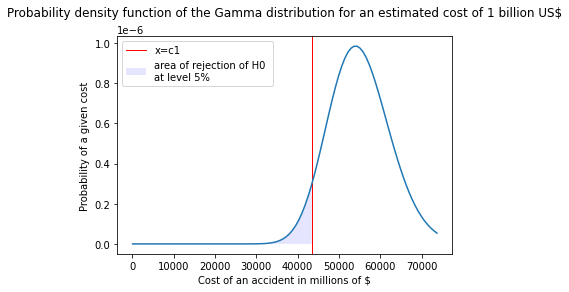

In [264]:
n = 55
theta = 1/1000 
c = stats.gamma.ppf(0.05, n, scale=1/theta)
x1 = np.linspace(stats.gamma.ppf(0.01, 55),
                stats.gamma.ppf(0.99, 55)*1000, 100)
plt.axline((c,0),(c,0.0000001),linewidth=1, color='r', label='x=c1')
y1=(1/55)*stats.gamma.pdf(x1, n, scale=1000)
sns.lineplot(x=x1, y=y1)

x2 = np.linspace(stats.gamma.ppf(0.01, 55),c, 100)
y2=(1/55)*stats.gamma.pdf(x2, n, scale=1000)
plt.fill_between(x2,0,y2, facecolor='blue', alpha=0.1, label='area of rejection of H0 \nat level 5%')
plt.legend()
plt.xlabel('Cost of an accident in millions of $')
plt.ylabel('Probability of a given cost')
plt.title("Probability density function of the Gamma distribution for an estimated cost of 1 billion US$", pad=20)
plt.show()

### Question 6

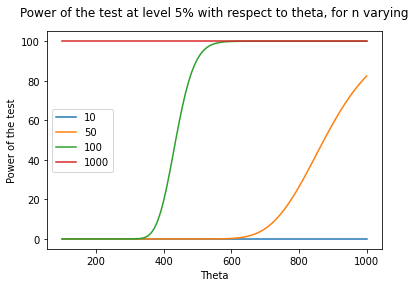

In [265]:
list_n=[10,50,100,1000]
theta = np.linspace(100, 1000, 100)
c=stats.gamma.ppf(0.05, 55, scale=1000)
for n in list_n:
    y=100*(1-stats.gamma.cdf(c,n,scale=theta))
    plt.plot(theta, y, label=n)
plt.legend()
plt.xlabel('Theta')
plt.ylabel('Power of the test')
plt.title('Power of the test at level 5% with respect to theta, for n varying', pad=15)
plt.show()

The power of the test in our case is $\beta = 1 - \mathrm{P}(S\ge c | \theta < 1000)$\
Hence, for an effective test, the power is 1.
We see that, the more observations we have, the more powerful our test is, whatever the value of $\theta$ is.

### Question 6 

The central limit theorem gives that $ \lim_{n\to\infty} \hat{g}(X) \sim \mathcal{N}(\frac{1}{\theta}, \frac{1}{\theta^2})$ meaning that $\frac{S}{n}\sim \mathcal{N}(\frac{1}{\theta}, \frac{1}{\sqrt{n}\theta})$

The test remains $\delta(X) = \mathbb{1}_{\{S<c\}}$\
And $\mathrm{P}(S <c) = \mathrm{P}(\frac{S}{n} < \frac{c}{n})$\
At level $\alpha = 0.05$, it gives $\frac{c}{n} = Q(\alpha)$ where Q is the inverse fo the cumulative distribution function for $\mathcal{N}(\frac{1}{\theta}, \frac{1}{\sqrt{n}\theta})$ where $\theta = \frac{1}{1000}$

In [266]:
c = 55 *stats.norm.ppf(0.05, loc=1000, scale=1000*(55)**-0.5)
print('The threshold of the new test is ',round(c,2))
S = np.sum(x)
if S < c :
    print('We reject H0')
if S>=c:
    print('H0 is the right hypothesis')

The threshold of the new test is  42801.44
We reject H0
